# Cluster

## Usage

See [link](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods)

## KMeans

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from 
, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated. Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

Cluster labels: [2 0 2 2 0 0 2 1 2 2 0 2 2 2 0 2 2 2 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 2 0 1 2 2 2 1 1 0 0 2 2 0 2 2 0 0 0 0 0 0 2 1 0 0 1 0 2 0 0 2 0 2
 2 2 2 2 0 1 0 2 0 1 0 1 1 0 2 0 2 0 0 2 0 1 2 0 1 1]
Cluster centroids: [[0.76167338 0.40765364]
 [0.27223715 0.21097997]
 [0.35217863 0.78488734]]


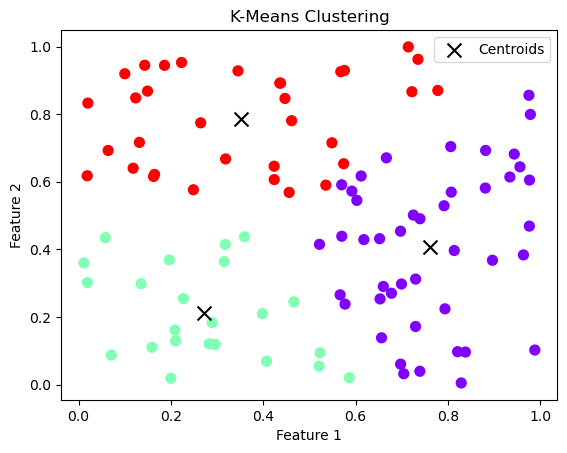

In [7]:
# Illustration of kmeans
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, n_clusters, max_iters=100):
    n_samples, n_features = X.shape
    
    # init center randomly
    random_indices = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = X[random_indices]
    
    for _ in range(max_iters):
        # assign sample to the nearest center
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # update center
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # if the center doesn't change, quit iteration
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

np.random.seed(0)
X = np.random.rand(100, 2)

n_clusters = 3
labels, centroids = kmeans(X, n_clusters)

print("Cluster labels:", labels)
print("Cluster centroids:", centroids)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [8]:
import numpy as np

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

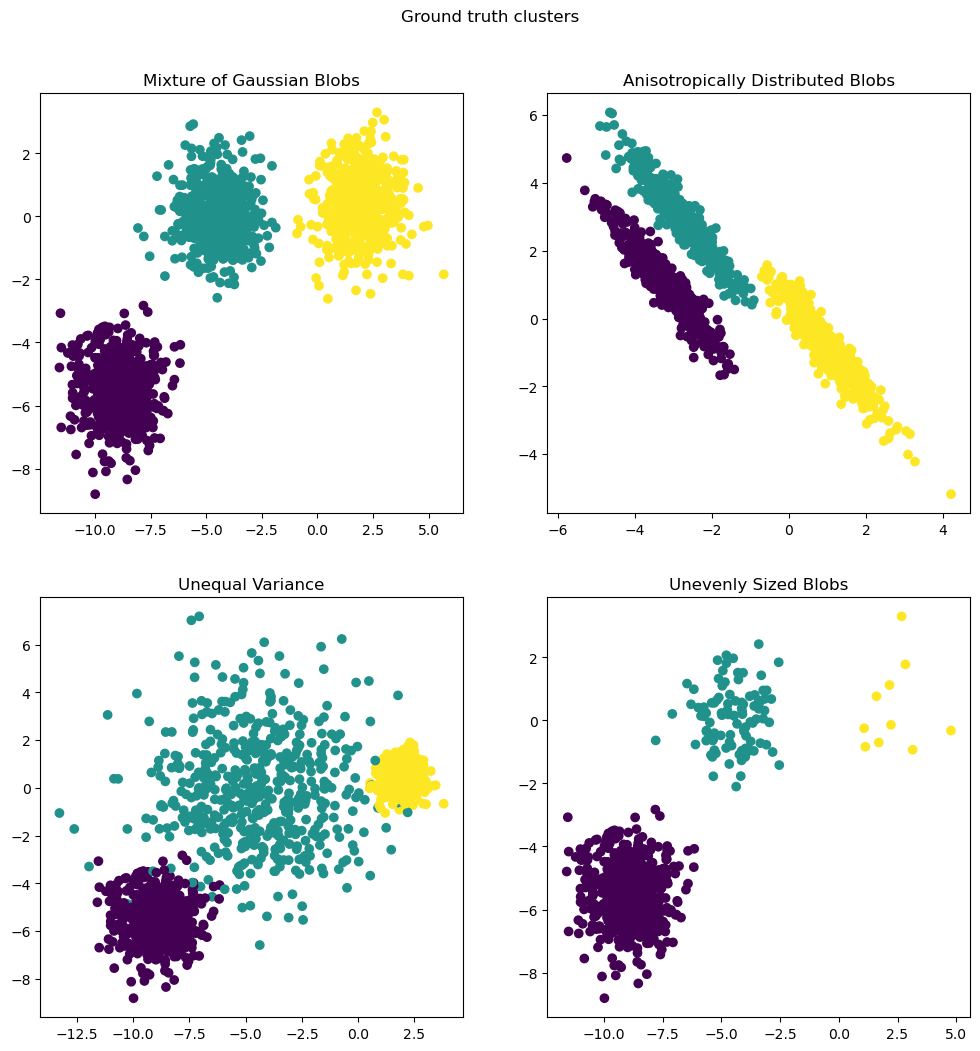

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

### Bad kmeans cluster

Due to wrong number of clusters, anisotropically distribute blobs, unequal variance and unequal blob size, we may get some bad results.

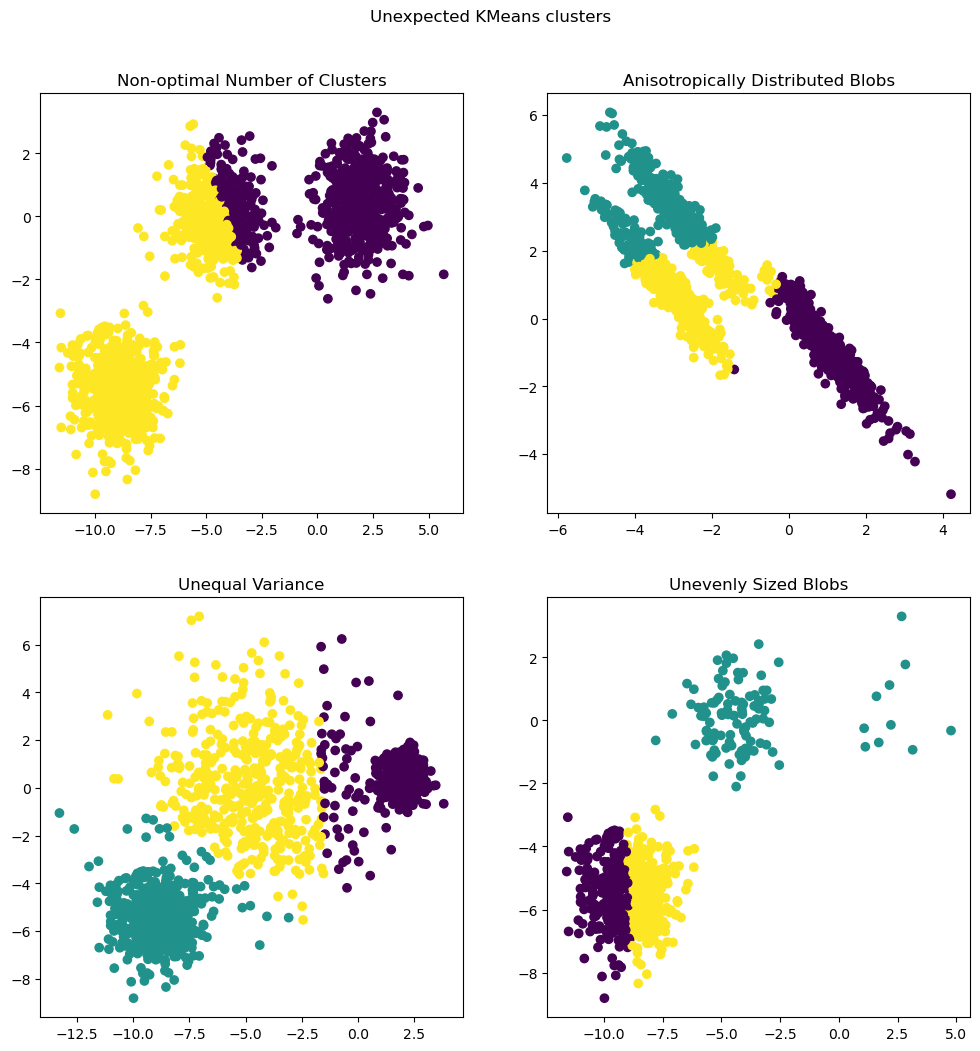

In [10]:
from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

By setting the correct number of cluster, we get a better cluster.

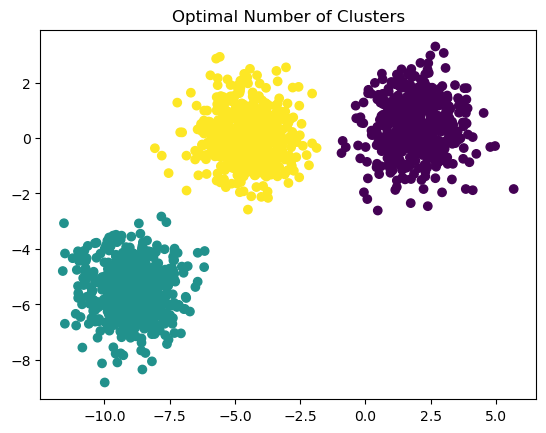

In [11]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

To deal with unevenly sized blobs one can increase the number of random initializations. In this case we set n_init=10 to avoid finding a sub-optimal local minimum.

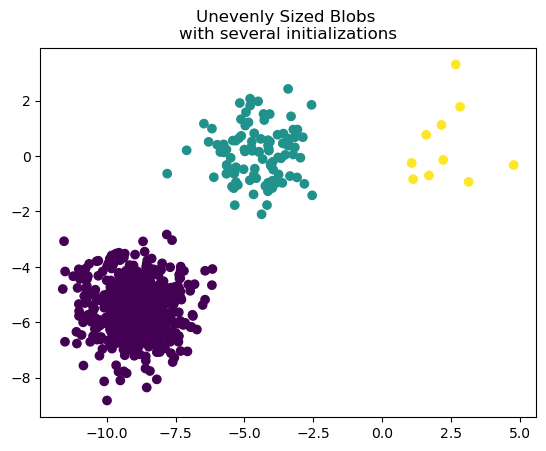

In [12]:
y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(
    X_filtered
)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs \nwith several initializations")
plt.show()

As anisotropic and unequal variances are real limitations of the k-means algorithm, here we propose instead the use of GaussianMixture, which also assumes gaussian clusters but does not impose any constraints on their variances. Notice that one still has to find the correct number of blobs.

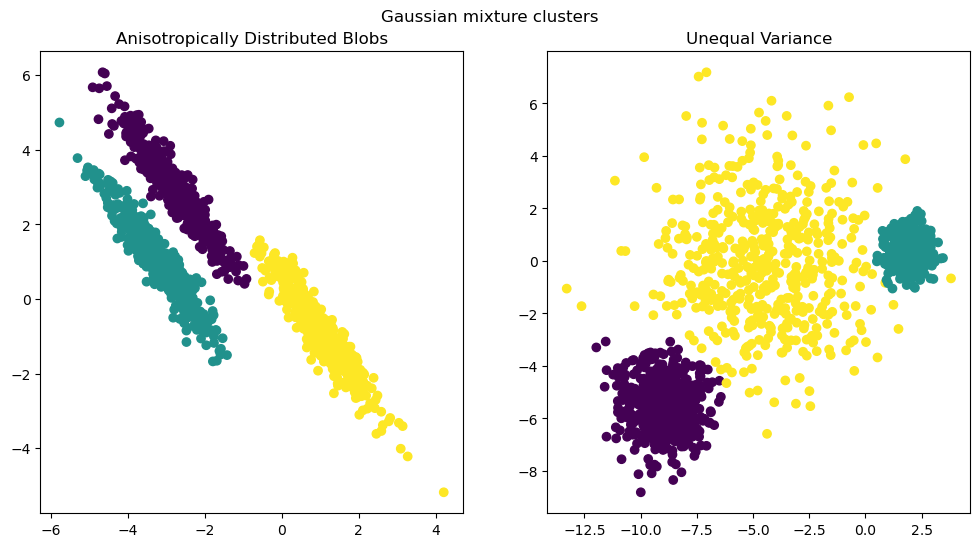

In [13]:
from sklearn.mixture import GaussianMixture

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax1.set_title("Anisotropically Distributed Blobs")

y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
ax2.set_title("Unequal Variance")

plt.suptitle("Gaussian mixture clusters").set_y(0.95)
plt.show()

## Affinity Propagation

